## Here is the reason if you need to relocate for the new job around the world

In this project, I want to analyze the best place to start a new career across the continents as Data Scientist based on the data from Stack Overflow 2017 survey.

1- Where is a better place to move to find a job (North America, Asia, Europe or other places)?!
2- What is the likelihood of increase or decrease in salary?
3- What about job satisfaction?

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Dataset View
First let's look at the data set in hand to get some insights and learn about available features

In [2]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset is made up of 154 different features and there are some Null values which should be taken care of!
Now let's see the histogram of the numeric features

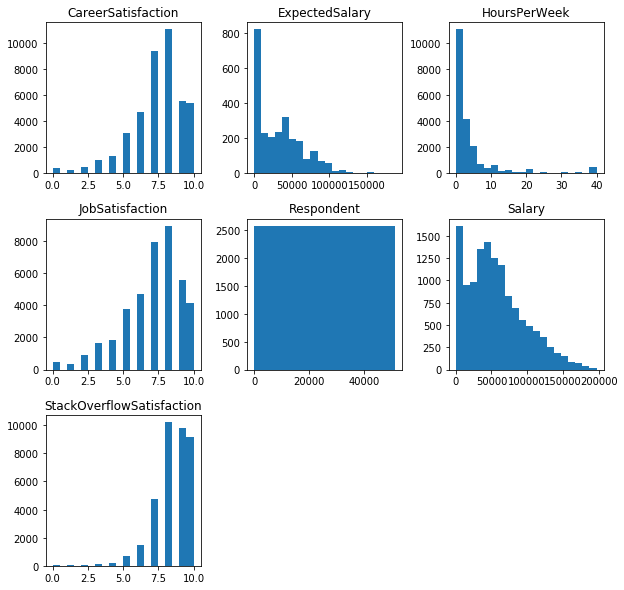

In [3]:
df.hist(figsize=(10, 10), bins=20, grid=False);

##### What is the distribution of proffesions between individuals?
There are 5 different professions which most of them (70%) are professional developer that make this dataset great to evaluate for the porpuse of this project

5


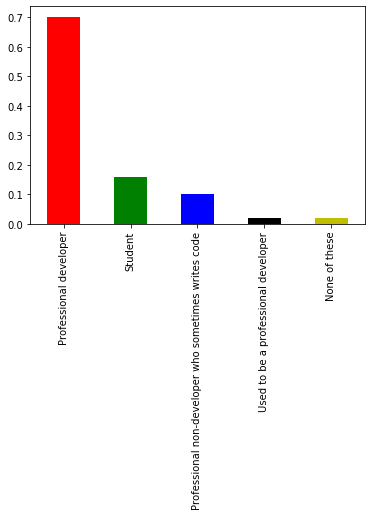

In [4]:
color = list('rgbkymc')
profession_vals = df['Professional'].value_counts()
print(len(profession_vals))
(profession_vals/df.shape[0]).plot(kind="bar", color=color);

##### Where are they from?
As we expect most of them are from USA and if we omit India all others are mostly from Europe!

201


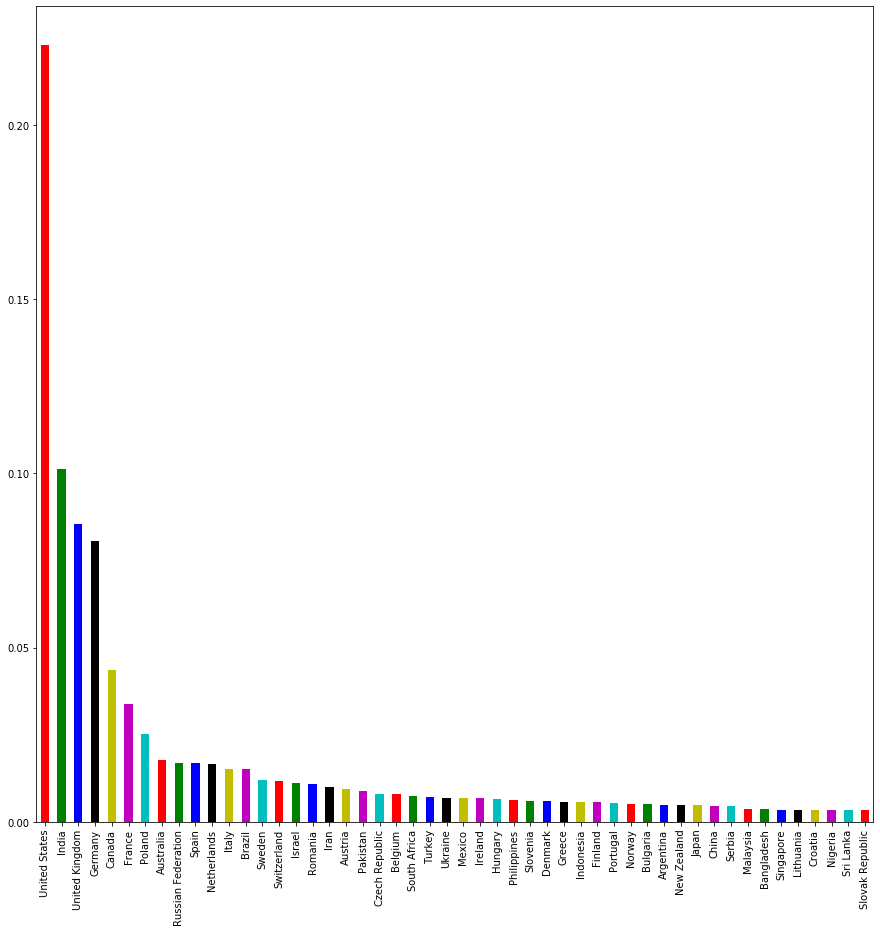

In [5]:
country_vals = df['Country'].value_counts()
print(len(country_vals))
(country_vals[:50]/df.shape[0]).plot(kind="bar", color=color, figsize=(15, 15));

There are 18 countries with number of developers more than 500. We can get an insight of grouping professions based on countries as follow

In [6]:
profession_country = df.groupby('Professional')['Country'].value_counts().unstack().fillna(0)


At the later steps I consider putting all these 18 countries on their right category of Location since there should be an impact by developers on these counries on the analysis. All these countries have more than 500 people attending the survey and as can bee seen below in each country most of the are "professional developers". "Iran" is a surprise in this list. Did you spot China, Japan and South Korea... Where are they?

In [7]:
profession_country_500 = profession_country.drop([col for col, val in profession_country.sum().iteritems() if val < 500], axis=1)
profession_country_500


Country,Australia,Brazil,Canada,France,Germany,India,Iran,Israel,Italy,Netherlands,Poland,Romania,Russian Federation,Spain,Sweden,Switzerland,United Kingdom,United States
Professional,,,,,,,,,,,,,,,,,,
None of these,22.0,12.0,35.0,18.0,91.0,54.0,4.0,6.0,17.0,20.0,16.0,9.0,14.0,9.0,15.0,16.0,82.0,247.0
Professional developer,643.0,592.0,1605.0,1246.0,2767.0,3438.0,314.0,459.0,536.0,571.0,954.0,427.0,631.0,688.0,460.0,406.0,3302.0,8310.0
Professional non-developer who sometimes writes code,112.0,63.0,186.0,119.0,493.0,439.0,75.0,41.0,87.0,87.0,116.0,35.0,106.0,77.0,58.0,56.0,405.0,1199.0
Student,111.0,95.0,355.0,322.0,731.0,1162.0,97.0,65.0,132.0,159.0,188.0,81.0,108.0,76.0,70.0,96.0,530.0,1456.0
Used to be a professional developer,25.0,15.0,52.0,35.0,61.0,104.0,17.0,4.0,9.0,18.0,16.0,9.0,14.0,14.0,8.0,21.0,76.0,243.0


##### I suspect below result is because developers are more conservative in east Asia so we don't have many developers information

In [8]:
profession_country[['South Korea', 'Japan', 'China', 'Iran']]

Country,South Korea,Japan,China,Iran
Professional,,,,
None of these,1.0,6.0,3.0,4.0
Professional developer,93.0,165.0,158.0,314.0
Professional non-developer who sometimes writes code,16.0,43.0,21.0,75.0
Student,52.0,31.0,51.0,97.0
Used to be a professional developer,2.0,3.0,6.0,17.0


7


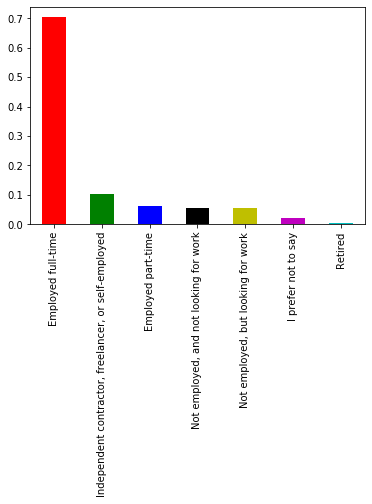

In [9]:
empl_vals = df['EmploymentStatus'].value_counts()
print(len(empl_vals))
(empl_vals/df.shape[0]).plot(kind="bar", color=color );

#### At this pont maybe it's better to think changing your job since most of the people think they are underpaid!!

5


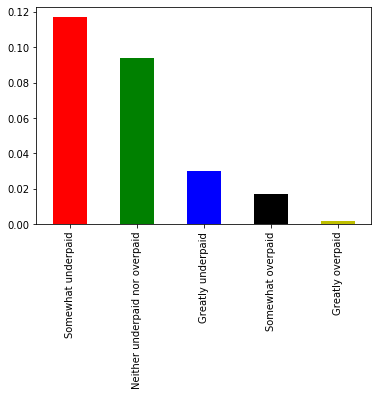

In [10]:
country_vals = df['Overpaid'].value_counts()
print(len(country_vals))
(country_vals/df.shape[0]).plot(kind="bar", color=color );

In [11]:
America = ['United States', 'Canada', 'Brazil', 'Argentina']
Europe = ['Liechtenstein', 'Switzerland', 'Iceland', 'Norway', 'Israel', 'Denmark', 'Ireland', 'United Kingdom',
          'Germany', 'Netherlands', 'Sweden', 'Luxembourg', 'Austria', 'Finland', 'France', 'Belgium', 'Spain',
          'Italy', 'Poland', 'Czech Republic', 'Romania']
Asia = ['Iran', 'Russian Federation','Israel', 'Australia', 'New Zealand', 'Thailand', 'Singapore', 'Hong Kong',
        'South Korea', 'Japan', 'China', 'Taiwan', 'Malaysia', 'India', 'Indonesia', 'Vietnam', 'Qatar', 'Oman',
       'United Arab Emirates']

In [12]:
df['Location'] = df['Country'].apply(lambda x: 'America' if x in America else ('Europe' if x in Europe else ('Asia' if x in Asia else 'Other')))


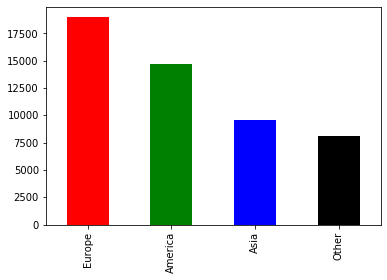

In [13]:
df['Location'].value_counts().plot(kind='bar', color=color);

I need to use the columns that I think are most suitable for this analysis.

I need to just consider those who are professional developer and full-time employed, as well.

In [14]:
best_columns = ['Country', 'YearsCodedJob', 'EmploymentStatus', 'CareerSatisfaction', 'JobSatisfaction', 'JobSeekingStatus', 'HoursPerWeek', 'Salary', 'Location', 'Overpaid']
df = pd.DataFrame(df.query("Professional == 'Professional developer' and EmploymentStatus == 'Employed full-time'"))[best_columns]

df

,Country,YearsCodedJob,EmploymentStatus,CareerSatisfaction,JobSatisfaction,JobSeekingStatus,HoursPerWeek,Salary,Location,Overpaid
2,United Kingdom,20 or more years,Employed full-time,8.0,9.0,NaN,NaN,113750.0,Europe,Neither underpaid nor overpaid
4,Switzerland,10 to 11 years,Employed full-time,6.0,8.0,NaN,NaN,NaN,Europe,NaN
7,Poland,7 to 8 years,Employed full-time,7.0,7.0,"I'm not actively looking, but I am open to new...",1.0,NaN,Europe,NaN
8,Colombia,7 to 8 years,Employed full-time,6.0,6.0,I am not interested in new job opportunities,2.0,NaN,Other,Neither underpaid nor overpaid
11,Canada,8 to 9 years,Employed full-time,8.0,6.0,NaN,NaN,NaN,America,NaN
...,...,...,...,...,...,...,...,...,...,...
51384,United States,8 to 9 years,Employed full-time,7.0,5.0,"I'm not actively looking, but I am open to new...",0.0,NaN,America,NaN
51386,Romania,3 to 4 years,Employed full-time,7.0,4.0,"I'm not actively looking, but I am open to new...",2.0,NaN,Europe,NaN
51387,United States,1 to 2 years,Employed full-time,7.0,3.0,I am actively looking for a job,5.0,58000.0,America,Greatly underpaid
51389,Canada,Less than a year,Employed full-time,10.0,10.0,NaN,NaN,NaN,America,NaN


In [15]:
overpaid_map = {
        'Greatly underpaid' : 1,
        'Somewhat underpaid' : 2,
        'Neither underpaid nor overpaid' : 3,
        'Somewhat overpaid' : 4,
        'Greatly overpaid' : 5,
        np.nan: np.nan
    }
df['Overpaid'] = df['Overpaid'].apply(lambda x: np.nan if x == np.nan else overpaid_map[x] )

In [16]:
df_comp = df.groupby(['Location','YearsCodedJob']).mean()

year_map = {'1 to 2 years' : 1, 
                '10 to 11 years' : 10, 
                '11 to 12 years' : 11, 
                '12 to 13 years' : 12,
                '13 to 14 years' : 13, 
                '14 to 15 years' : 14, 
                '15 to 16 years' : 15, 
                '16 to 17 years' : 16,
                '17 to 18 years' : 17, 
                '18 to 19 years' : 18, 
                '19 to 20 years' : 19, 
                '2 to 3 years' : 2,
                '20 or more years' : 20, 
                '3 to 4 years' : 3, 
                '4 to 5 years' : 4, 
                '5 to 6 years' : 5, 
                '6 to 7 years' : 6, 
                '7 to 8 years' : 7, 
                '8 to 9 years' : 8, 
                '9 to 10 years' : 9, 
                'Less than a year' : 0}
df_comp = df_comp.reset_index()

In [17]:
df_comp

,Location,YearsCodedJob,CareerSatisfaction,JobSatisfaction,HoursPerWeek,Salary,Overpaid
0,America,1 to 2 years,7.702489,7.097616,3.263889,62447.727684,2.352941
1,America,10 to 11 years,7.867347,7.267176,2.070064,99070.072548,2.524752
2,America,11 to 12 years,7.744770,7.222689,1.590000,94511.338159,2.435484
3,America,12 to 13 years,7.719457,7.036199,2.292135,109652.460481,2.533898
4,America,13 to 14 years,7.570513,7.045161,3.118644,102301.895199,2.627907
...,...,...,...,...,...,...,...
79,Other,6 to 7 years,7.259740,6.766234,3.923810,25938.653187,2.522727
80,Other,7 to 8 years,7.640553,7.259259,2.441176,29548.312921,2.550562
81,Other,8 to 9 years,7.846154,7.006993,2.372881,27815.595499,2.377049
82,Other,9 to 10 years,7.596859,6.905263,2.773333,29201.845497,2.367089


In [18]:
df_comp['YearsCodedJob'] = df_comp['YearsCodedJob'].apply(lambda x: np.nan if x == np.nan else year_map[x])
df_comp['YearsCodedJob'] = pd.to_numeric(df_comp['YearsCodedJob'])
df_comp = df_comp.sort_values(by='YearsCodedJob')
df_comp.set_index('YearsCodedJob', inplace=True)

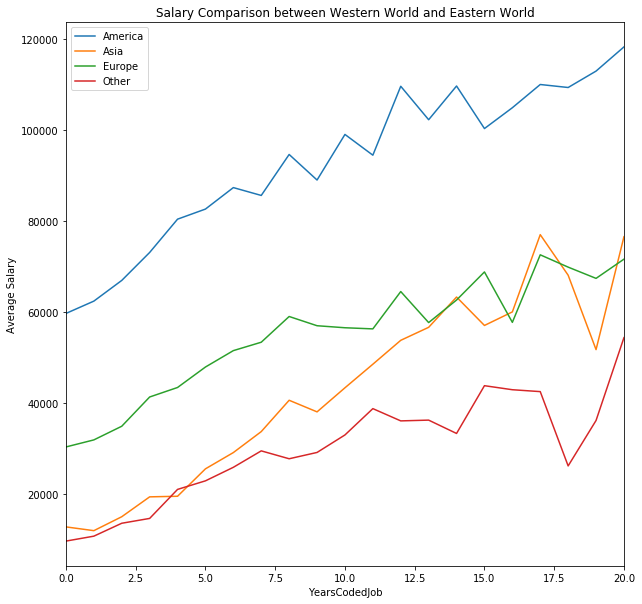

In [19]:
df_comp.groupby('Location')['Salary'].plot(legend=True, figsize=(10, 10));
plt.title("Range of Salary between different areas");
plt.xlabel('YearsCodedJob');
plt.ylabel('Average Salary');

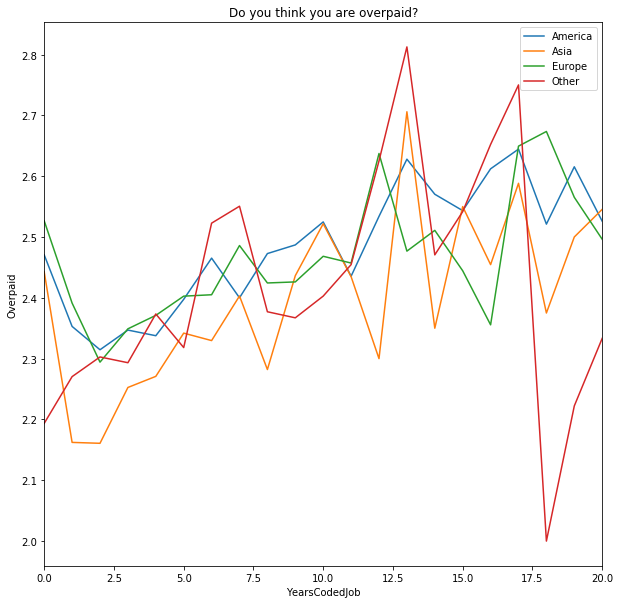

In [20]:
df_comp.groupby('Location')['Overpaid'].plot(legend=True, figsize=(10, 10))
plt.title("Who thinks that they are Overpaid?");
plt.xlabel('YearsCodedJob')
plt.ylabel('Overpaid');

In [21]:
df_comp.groupby('Location').mean().CareerSatisfaction

Location
America    7.785370
Asia       7.150064
Europe     7.346621
Other      7.507705
Name: CareerSatisfaction, dtype: float64

In [22]:
df_comp.groupby('Location').mean().JobSatisfaction

Location
America    7.229052
Asia       6.768114
Europe     7.035250
Other      7.056806
Name: JobSatisfaction, dtype: float64

In [23]:
df_comp.groupby('Location').mean().Salary/12

Location
America    7751.901422
Asia       3583.100241
Europe     4593.167168
Other      2497.786987
Name: Salary, dtype: float64

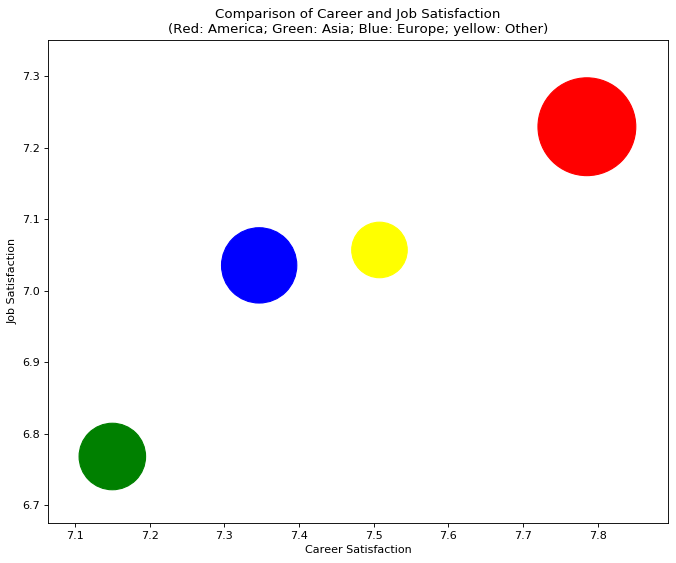

In [24]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(df_comp.groupby('Location').mean().CareerSatisfaction, df_comp.groupby('Location').mean().JobSatisfaction, df_comp.groupby('Location').mean().Salary/12, c=['red','green','blue','yellow'])

plt.title('Comparison of Career and Job Satisfaction\n(Red: America; Green: Asia; Blue: Europe; yellow: Other)')
plt.xlabel('Career Satisfaction')
plt.ylabel('Job Satisfaction');

### Some Observation
###### Despite the fact that Asian are getting paid more than African and South American (except Brazil and Argentina) they tend to be less satisfied of their job
##### In the first palce I thought maybe China or India cause this level of satisfaction on Asia but after a couple of more experiments "surprisingly" full-time developers in east Asia like Singapore, Vietnam, South Korea, Japan, Indonesia cause low level of satisfaction
##### Here we have to take into account the cost of living as well for example Japan and South Korea are considered as expensive countries
##### On a monthly basis African and South American get roughly half salary of European but satisfaction is higher
##### Regarding all the criteria America is the best place to Work (not a surprise)
##### I considered Australia and New Zealand as part of Asia (you can imagine a more drop in satisfaction if I separate them ffrom Asia)